In [50]:
import pandas as pd
import numpy as np

import os
import requests
import json

from ydata_profiling import ProfileReport # for EDA

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
ruta_data = "../data/data_casal_montserratina/"

# Petición a la API de weatherbit 

In [52]:
# #params
# lat = 41.32062    # casal de la montserratina
# lon = 2.0105984   # casal de la montserratina
# start_date = '2022-01-01'
# end_date = '2022-12-31'
# key = '721fef6a25f1470bbd45601158e5c711'   # Tu clave de API de Weatherbit

# # URL base de la API de Weatherbit
# history_hourly_URL = 'https://api.weatherbit.io/v2.0/history/hourly?lat={}&lon={}&start_date={}&end_date={}&tz=local&key={}'.format(lat, lon, start_date, end_date, key)
     
# # Realizar la solicitud GET a la API de Weatherbit
# response = requests.get(history_hourly_URL)

# # Verificar si la solicitud fue exitosa (código de estado 200)
# if response.status_code == 200:
#     # Convertir la respuesta a formato JSON
#     data = response.json()
    
#     # Imprimir la respuesta (en este ejemplo, solo mostramos el primer resultado)
#     print(data['data'][0])
# else:
#     # Si la solicitud no fue exitosa, imprimir el mensaje de error
#     print("Error al realizar la solicitud:", response.status_code)
# #nombre_archivo = "hourly_weather_lat={}&lon={}&start_date={}&end_date={}.json".format(lat, lon, start_date, end_date)
# nombre_archivo = "hourly_weather_2022.json"

# ruta_completa = os.path.join(ruta_data, nombre_archivo)

# # Guarda el diccionario como JSON en el archivo
# with open(ruta_completa, 'w') as archivo:
#     json.dump(data, archivo)

# print("Archivo .JSON guardado correctamente.")  

In [53]:
# #params
# lat = 41.32062    # casal de la montserratina
# lon = 2.0105984   # casal de la montserratina
# start_date = '2023-01-01'
# end_date = '2023-12-31'
# key = '721fef6a25f1470bbd45601158e5c711'   # Tu clave de API de Weatherbit

# # URL base de la API de Weatherbit
# history_hourly_URL = 'https://api.weatherbit.io/v2.0/history/hourly?lat={}&lon={}&start_date={}&end_date={}&tz=local&key={}'.format(lat, lon, start_date, end_date, key)
     
# # Realizar la solicitud GET a la API de Weatherbit
# response = requests.get(history_hourly_URL)

# # Verificar si la solicitud fue exitosa (código de estado 200)
# if response.status_code == 200:
#     # Convertir la respuesta a formato JSON
#     data = response.json()
    
#     # Imprimir la respuesta (en este ejemplo, solo mostramos el primer resultado)
#     print(data['data'][0])
# else:
#     # Si la solicitud no fue exitosa, imprimir el mensaje de error
#     print("Error al realizar la solicitud:", response.status_code)
# # nombre_archivo = "hourly_weather_lat={}&lon={}&start_date={}&end_date={}.json".format(lat, lon, start_date, end_date)
# nombre_archivo = "hourly_weather_2023.json"

# ruta_completa = os.path.join(ruta_data, nombre_archivo)

# # Guarda el diccionario como JSON en el archivo
# with open(ruta_completa, 'w') as archivo:
#     json.dump(data, archivo)

# print("Archivo .JSON guardado correctamente.")

In [54]:
# #params
# lat = 41.32062    # casal de la montserratina
# lon = 2.0105984   # casal de la montserratina
# start_date = '2024-01-01'
# end_date = '2024-05-07'
# key = '721fef6a25f1470bbd45601158e5c711'   # Tu clave de API de Weatherbit

# # URL base de la API de Weatherbit
# history_hourly_URL = 'https://api.weatherbit.io/v2.0/history/hourly?lat={}&lon={}&start_date={}&end_date={}&tz=local&key={}'.format(lat, lon, start_date, end_date, key)
     
# # Realizar la solicitud GET a la API de Weatherbit
# response = requests.get(history_hourly_URL)

# # Verificar si la solicitud fue exitosa (código de estado 200)
# if response.status_code == 200:
#     # Convertir la respuesta a formato JSON
#     data = response.json()
    
#     # Imprimir la respuesta (en este ejemplo, solo mostramos el primer resultado)
#     print(data['data'][0])
# else:
#     # Si la solicitud no fue exitosa, imprimir el mensaje de error
#     print("Error al realizar la solicitud:", response.status_code)
# #nombre_archivo = "hourly_weather_lat={}&lon={}&start_date={}&end_date={}.json".format(lat, lon, start_date, end_date)
# nombre_archivo = "hourly_weather_2024.json"

# ruta_completa = os.path.join(ruta_data, nombre_archivo)

# # Guarda el diccionario como JSON en el archivo
# with open(ruta_completa, 'w') as archivo:
#     json.dump(data, archivo)

# print("Archivo .JSON guardado correctamente.")  

# Lectura .JSON y desarollo del Dataframe

In [55]:
def load_json_to_DF(ruta, nombre_archivo):

    # Concatenamos la ruta completa
    ruta_completa = os.path.join(ruta, nombre_archivo)

    # Abrimos el archivo y cargamos el JSON
    with open(ruta_completa) as archivo:
        datos = json.load(archivo)
    # print("Archivo .JSON cargado correctamente.")

    # Extraer los datos de la clave "data"
    datos = datos["data"] 
    # print("Datos extraidas correctamente.")

    # Convertir a DataFrame
    datos = pd.DataFrame(datos)
    # print("DataFrame creado correctamente.")

    return datos

In [56]:
def format_df (dataframe):
    """
    VARIABLES METEREOLOGICAS 
    timestamp_local: Timestamp at Local time.
    pres: Pressure (mb).
    slp: Sea level pressure (mb).
    wind_spd: Wind speed (Default m/s).
    wind_gust_spd: Wind gust speed (Default m/s).
    wind_dir: Wind direction (degrees).
    temp: Temperature (default Celsius).
    app_temp: Apparent/"Feels Like" temperature (default Celsius).
    rh: Relative humidity (%).
    dewpt: Dew point (default Celsius).
    clouds:[Satellite based] cloud coverage (%).
    vis: Visibility (default KM).
    precip: Accumulated liquid equivalent precipitation (default mm).
    dhi: Diffuse horizontal solar irradiance (W/m^2) [Clear Sky]
    dni: Direct normal solar irradiance (W/m^2) [Clear Sky]
    ghi: Global horizontal solar irradiance (W/m^2) [Clear Sky]
    solar_rad: Estimated Solar Radiation (W/m^2).
    uv: UV Index (0-11+).
    elev_angle: Solar elevation angle (degrees).
    azimuth: Solar azimuth angle (degrees).
    """
    
    # vienen muchas columnas, solo interesa quedarme con algunas
    columnas_deseadas = ['timestamp_local', 'pres', 'slp', 'wind_dir', 'wind_gust_spd', 'wind_spd', 'temp', 'app_temp', 'rh', 
                         'dewpt', 'clouds',"vis", 'precip', 'dhi', 'dni', 'ghi', 'solar_rad', 'uv', 'elev_angle','azimuth'] 


    # Seleccionar solo las columnas deseadas
    dataframe = dataframe.loc[:, columnas_deseadas]


    dataframe = dataframe.rename(columns={ 
    "temp": "temp [C]", 
    "wind_spd": "wind_spd [m/s]", 
    "dhi": "dhi [W/m^2]", 
    "ghi": "ghi [W/m^2]", 
    "dni": "dni [W/m^2]", 
    'clouds': 'clouds [%]', 
    'dewpt': 'dewpt [C]', 
    'rh': 'rh [%]',
    'pres' : 'pres [mb]', 
    'slp' : 'slp [mb]', 
    'wind_dir' : 'wind_dir [m/s]', 
    'wind_gust_spd' : 'wind_gust_spd [m/s]', 
    'app_temp' : 'app_temp [C]', 
    'vis' : 'vis [Km]', 
    'precip' : 'precip [mm]',  
    'solar_rad' : 'solar_rad [W/m^2]', 
    'uv' : 'uv [0-11+]', 
    'elev_angle' : 'elev_angle [º]',
    'azimuth' : 'azimuth [º]'
    })

    return dataframe

In [57]:
# Load the JSON file
nombre_archivo_2022 = "hourly_weather_2022.json"
df_2022 = load_json_to_DF(ruta_data, nombre_archivo_2022)

nombre_archivo_2023 = "hourly_weather_2023.json"
df_2023 = load_json_to_DF(ruta_data, nombre_archivo_2023)

nombre_archivo_2024 = "hourly_weather_2024.json"
df_2024 = load_json_to_DF(ruta_data, nombre_archivo_2024)

In [58]:
# hago un concat de los dos dataframes
df = pd.concat([df_2022, df_2023, df_2024])
df

,app_temp,azimuth,clouds,datetime,dewpt,dhi,dni,elev_angle,ghi,h_angle,...,temp,timestamp_local,timestamp_utc,ts,uv,vis,weather,wind_dir,wind_gust_spd,wind_spd
0,10.7,323.5,87,2021-12-31:23,9.5,0,0,-68.4,0,None,...,10.7,2022-01-01T00:00:00,2021-12-31T23:00:00,1640991600,0.0,11,"{'code': 804, 'icon': 'c04n', 'description': '...",360,4.0,1.0
1,10.7,3.8,62,2022-01-01:00,8.8,0,0,-71.7,0,None,...,10.7,2022-01-01T01:00:00,2022-01-01T00:00:00,1640995200,0.0,12,"{'code': 803, 'icon': 'c03n', 'description': '...",350,4.4,2.6
2,10.7,41.8,87,2022-01-01:01,9.0,0,0,-67.2,0,None,...,10.7,2022-01-01T02:00:00,2022-01-01T01:00:00,1640998800,0.0,8,"{'code': 804, 'icon': 'c04n', 'description': '...",350,5.2,2.6
3,10.2,64.8,68,2022-01-01:02,8.5,0,0,-58.1,0,None,...,10.2,2022-01-01T03:00:00,2022-01-01T02:00:00,1641002400,0.0,8,"{'code': 803, 'icon': 'c03n', 'description': '...",350,5.2,2.6
4,10.5,79.3,75,2022-01-01:03,9.3,0,0,-47.4,0,None,...,10.5,2022-01-01T04:00:00,2022-01-01T03:00:00,1641006000,0.0,2,"{'code': 721, 'icon': 'a03n', 'description': '...",340,5.2,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,17.0,275.2,100,2024-05-06:17,11.9,76,659,19.9,294,None,...,17.0,2024-05-06T19:00:00,2024-05-06T17:00:00,1715014800,0.7,16,"{'code': 804, 'icon': 'c04d', 'description': '...",100,5.8,5.1
3043,17.0,284.6,100,2024-05-06:18,11.9,48,433,8.9,106,None,...,17.0,2024-05-06T20:00:00,2024-05-06T18:00:00,1715018400,0.6,16,"{'code': 804, 'icon': 'c04d', 'description': '...",90,4.5,4.1
3044,16.0,294.3,42,2024-05-06:19,12.0,0,0,-1.8,0,None,...,16.0,2024-05-06T21:00:00,2024-05-06T19:00:00,1715022000,0.0,16,"{'code': 803, 'icon': 'c03n', 'description': '...",100,2.2,2.1
3045,16.0,304.9,81,2024-05-06:20,12.0,0,0,-11.5,0,None,...,16.0,2024-05-06T22:00:00,2024-05-06T20:00:00,1715025600,0.0,16,"{'code': 804, 'icon': 'c04n', 'description': '...",0,0.5,0.5


# Analisis del DF resultante

In [59]:
# Convertir la columna "fecha" a datetime
df["timestamp_local"] = pd.to_datetime(df["timestamp_local"], format="%Y-%m-%dT%H:%M:%S")
#df["timestamp_utc"] = pd.to_datetime(df["timestamp_utc"], format="%Y-%m-%dT%H:%M:%S")

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20519 entries, 0 to 3046
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   app_temp         20519 non-null  float64       
 1   azimuth          20519 non-null  float64       
 2   clouds           20519 non-null  int64         
 3   datetime         20519 non-null  object        
 4   dewpt            20519 non-null  float64       
 5   dhi              20519 non-null  int64         
 6   dni              20519 non-null  int64         
 7   elev_angle       20519 non-null  float64       
 8   ghi              20519 non-null  int64         
 9   h_angle          0 non-null      object        
 10  pod              20519 non-null  object        
 11  precip           20519 non-null  float64       
 12  pres             20519 non-null  int64         
 13  revision_status  20519 non-null  object        
 14  rh               20519 non-null  int64      

In [61]:
df.columns

Index(['app_temp', 'azimuth', 'clouds', 'datetime', 'dewpt', 'dhi', 'dni',
       'elev_angle', 'ghi', 'h_angle', 'pod', 'precip', 'pres',
       'revision_status', 'rh', 'slp', 'snow', 'solar_rad', 'temp',
       'timestamp_local', 'timestamp_utc', 'ts', 'uv', 'vis', 'weather',
       'wind_dir', 'wind_gust_spd', 'wind_spd'],
      dtype='object')

In [62]:
df = format_df(df)

In [63]:
# # Generate the report
# profile = ProfileReport(df,title="hourly_weather_2022_2023", tsmode=True, sortby="timestamp_local")

# # Save the report to .html
# profile.to_file("hourly_weather_2022_2023.html")

# profile

no se observan duplicados, NaNs, faltantes, etc.... el df está muy limpio.


Variable Weatherbit      Descripción                                       Unidades 
'''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
timestamp_local          Timestamp en la hora local  
timestamp_utc            Timestamp en UTC 
temp                     Temperatura                                        Celsius (por defecto) 
wind_spd                 Velocidad del viento                               m/s (por defecto) 
dhi                      Irradiancia solar difusa en el plano horizontal    W/m2 [Clear Sky] 
ghi                      Irradiancia solar global en el plano horizontal    W/m2 [Clear Sky] 
dni                      Irradiancia solar directa normal                   W/m2 [Clear Sky] 

# Armonizacion de unidades de Medida

para evitar incongreuencia con las unidades, las agrego al nombre de la variable. ya veré si es necesario mantenerla en las mismas unidades o cambiarlas mediante => Irradiancia[kW/m2] = Irradiancia[W/m2]/1000;



# Resample - Cambiar frecuencia horaria a cuarto-horaria

In [64]:
df.set_index("timestamp_local", inplace=True)

In [65]:
df.tail()

,pres [mb],slp [mb],wind_dir [m/s],wind_gust_spd [m/s],wind_spd [m/s],temp [C],app_temp [C],rh [%],dewpt [C],clouds [%],vis [Km],precip [mm],dhi [W/m^2],dni [W/m^2],ghi [W/m^2],solar_rad [W/m^2],uv [0-11+],elev_angle [º],azimuth [º]
timestamp_local,,,,,,,,,,,,,,,,,,,
2024-05-06 19:00:00,1011,1012,100,5.8,5.1,17.0,17.0,72,11.9,100,16,0.0,76,659,294,95,0.7,19.9,275.2
2024-05-06 20:00:00,1012,1013,90,4.5,4.1,17.0,17.0,72,11.9,100,16,0.0,48,433,106,54,0.6,8.9,284.6
2024-05-06 21:00:00,1013,1014,100,2.2,2.1,16.0,16.0,77,12.0,42,16,0.0,0,0,0,0,0.0,-1.8,294.3
2024-05-06 22:00:00,1013,1014,0,0.5,0.5,16.0,16.0,77,12.0,81,16,0.0,0,0,0,0,0.0,-11.5,304.9
2024-05-06 23:00:00,1014,1015,230,1.6,1.5,15.0,15.0,82,12.0,100,16,0.0,0,0,0,0,0.0,-20.0,317.0


In [66]:
# df_upsampled = df.groupby(level=-1).first()
df_upsampled = df.copy()
df_upsampled.drop_duplicates(inplace=True)
df_upsampled.head()

,pres [mb],slp [mb],wind_dir [m/s],wind_gust_spd [m/s],wind_spd [m/s],temp [C],app_temp [C],rh [%],dewpt [C],clouds [%],vis [Km],precip [mm],dhi [W/m^2],dni [W/m^2],ghi [W/m^2],solar_rad [W/m^2],uv [0-11+],elev_angle [º],azimuth [º]
timestamp_local,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,1027,1028,360,4.0,1.0,10.7,10.7,92,9.5,87,11,0.0,0,0,0,0,0.0,-68.4,323.5
2022-01-01 01:00:00,1027,1028,350,4.4,2.6,10.7,10.7,88,8.8,62,12,0.0,0,0,0,0,0.0,-71.7,3.8
2022-01-01 02:00:00,1026,1027,350,5.2,2.6,10.7,10.7,89,9.0,87,8,0.0,0,0,0,0,0.0,-67.2,41.8
2022-01-01 03:00:00,1026,1027,350,5.2,2.6,10.2,10.2,89,8.5,68,8,0.0,0,0,0,0,0.0,-58.1,64.8
2022-01-01 04:00:00,1026,1027,340,5.2,1.5,10.5,10.5,92,9.3,75,2,0.0,0,0,0,0,0.0,-47.4,79.3


In [67]:
df_upsampled = df.copy()
df_upsampled = df_upsampled.groupby(df_upsampled.index).first().resample('15T').interpolate(method='linear')
#df_upsampled.head(4)

C:\Users\afernandez\AppData\Local\Temp\ipykernel_8536\1011488432.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_upsampled = df_upsampled.groupby(df_upsampled.index).first().resample('15T').interpolate(method='linear')


In [68]:
#df_upsampled.tail(4)

In [69]:
dff = df_upsampled.reset_index()
dff

,timestamp_local,pres [mb],slp [mb],wind_dir [m/s],wind_gust_spd [m/s],wind_spd [m/s],temp [C],app_temp [C],rh [%],dewpt [C],clouds [%],vis [Km],precip [mm],dhi [W/m^2],dni [W/m^2],ghi [W/m^2],solar_rad [W/m^2],uv [0-11+],elev_angle [º],azimuth [º]
0,2022-01-01 00:00:00,1027.00,1028.00,360.0,4.000,1.00,10.70,10.70,92.00,9.500,87.00,11.00,0.0,0.0,0.0,0.0,0.0,0.0,-68.400,323.500
1,2022-01-01 00:15:00,1027.00,1028.00,357.5,4.100,1.40,10.70,10.70,91.00,9.325,80.75,11.25,0.0,0.0,0.0,0.0,0.0,0.0,-69.225,243.575
2,2022-01-01 00:30:00,1027.00,1028.00,355.0,4.200,1.80,10.70,10.70,90.00,9.150,74.50,11.50,0.0,0.0,0.0,0.0,0.0,0.0,-70.050,163.650
3,2022-01-01 00:45:00,1027.00,1028.00,352.5,4.300,2.20,10.70,10.70,89.00,8.975,68.25,11.75,0.0,0.0,0.0,0.0,0.0,0.0,-70.875,83.725
4,2022-01-01 01:00:00,1027.00,1028.00,350.0,4.400,2.60,10.70,10.70,88.00,8.800,62.00,12.00,0.0,0.0,0.0,0.0,0.0,0.0,-71.700,3.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82264,2024-05-06 22:00:00,1013.00,1014.00,0.0,0.500,0.50,16.00,16.00,77.00,12.000,81.00,16.00,0.0,0.0,0.0,0.0,0.0,0.0,-11.500,304.900
82265,2024-05-06 22:15:00,1013.25,1014.25,57.5,0.775,0.75,15.75,15.75,78.25,12.000,85.75,16.00,0.0,0.0,0.0,0.0,0.0,0.0,-13.625,307.925
82266,2024-05-06 22:30:00,1013.50,1014.50,115.0,1.050,1.00,15.50,15.50,79.50,12.000,90.50,16.00,0.0,0.0,0.0,0.0,0.0,0.0,-15.750,310.950
82267,2024-05-06 22:45:00,1013.75,1014.75,172.5,1.325,1.25,15.25,15.25,80.75,12.000,95.25,16.00,0.0,0.0,0.0,0.0,0.0,0.0,-17.875,313.975


In [70]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82269 entries, 0 to 82268
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp_local      82269 non-null  datetime64[ns]
 1   pres [mb]            82269 non-null  float64       
 2   slp [mb]             82269 non-null  float64       
 3   wind_dir [m/s]       82269 non-null  float64       
 4   wind_gust_spd [m/s]  82269 non-null  float64       
 5   wind_spd [m/s]       82269 non-null  float64       
 6   temp [C]             82269 non-null  float64       
 7   app_temp [C]         82269 non-null  float64       
 8   rh [%]               82269 non-null  float64       
 9   dewpt [C]            82269 non-null  float64       
 10  clouds [%]           82269 non-null  float64       
 11  vis [Km]             82269 non-null  float64       
 12  precip [mm]          82269 non-null  float64       
 13  dhi [W/m^2]          82269 non-

# Estimación de la producción solar de un sistema fotovoltaico

Primero se calcula el parametro TM(t) que corresponde a la temperatura interior de los Modulos/placas a tiempo t.

La temperatura interior del m'odulo viene dada por  >>>> TM[i] = 17.23292 + 0.451708 * t_out[i] + 0.022706 * irr[i]

Donde:     
- t_out <-> temp ambiente (temp) [°C]
 
-  irr   <-> Irradiancia directa normal (dni) [kW/m2] 

In [71]:
df_upsampled["Temp interna Modulo [C]"] = 17.23292 + 0.451708 * df_upsampled["temp [C]"] + 0.022706 * df_upsampled["dni [W/m^2]"]

In [72]:
df_upsampled.head()

,pres [mb],slp [mb],wind_dir [m/s],wind_gust_spd [m/s],wind_spd [m/s],temp [C],app_temp [C],rh [%],dewpt [C],clouds [%],vis [Km],precip [mm],dhi [W/m^2],dni [W/m^2],ghi [W/m^2],solar_rad [W/m^2],uv [0-11+],elev_angle [º],azimuth [º],Temp interna Modulo [C]
timestamp_local,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,1027.0,1028.0,360.0,4.0,1.0,10.7,10.7,92.0,9.500,87.00,11.00,0.0,0.0,0.0,0.0,0.0,0.0,-68.400,323.500,22.066196
2022-01-01 00:15:00,1027.0,1028.0,357.5,4.1,1.4,10.7,10.7,91.0,9.325,80.75,11.25,0.0,0.0,0.0,0.0,0.0,0.0,-69.225,243.575,22.066196
2022-01-01 00:30:00,1027.0,1028.0,355.0,4.2,1.8,10.7,10.7,90.0,9.150,74.50,11.50,0.0,0.0,0.0,0.0,0.0,0.0,-70.050,163.650,22.066196
2022-01-01 00:45:00,1027.0,1028.0,352.5,4.3,2.2,10.7,10.7,89.0,8.975,68.25,11.75,0.0,0.0,0.0,0.0,0.0,0.0,-70.875,83.725,22.066196
2022-01-01 01:00:00,1027.0,1028.0,350.0,4.4,2.6,10.7,10.7,88.0,8.800,62.00,12.00,0.0,0.0,0.0,0.0,0.0,0.0,-71.700,3.800,22.066196


luego se introduce la formula de generacion electrica de una placa solar

PV[i] = max(0, (((-0.062059 * irr[i] + 0.04277774) * TM[i] + 9.692792 * irr[i] - 1.885868)) * (PPv / 6.6))

donde:
- PV[i]     es la generacion electrica de una placa solar en las condiciones dadas. supongo que las unidades son [Kw]
- PPv       es la Potencia instalada / potencia máxima de generación [kW]
- irr[i]    es la Irradiancia directa normal [kW/m2] 
- TM[i]     es la temperatura interna del modulo/placa solar
 

In [73]:
PPvn = 5000 # 5Kw = 5000 watts
irr = df_upsampled["dni [W/m^2]"]
TM = df_upsampled["Temp interna Modulo [C]"]

df_upsampled["PV [Wh]"] = (np.maximum(0, ((-0.062059 * irr + 0.04277774)* TM) + 9.692792 * irr - 1.885868 )* PPvn) / 6.6

In [74]:
df_upsampled.sample(5)

,pres [mb],slp [mb],wind_dir [m/s],wind_gust_spd [m/s],wind_spd [m/s],temp [C],app_temp [C],rh [%],dewpt [C],clouds [%],...,precip [mm],dhi [W/m^2],dni [W/m^2],ghi [W/m^2],solar_rad [W/m^2],uv [0-11+],elev_angle [º],azimuth [º],Temp interna Modulo [C],PV [Wh]
timestamp_local,,,,,,,,,,,,,,,,,,,,,
2023-06-22 12:00:00,1015.00,1016.00,240.0,6.200,6.2000,29.100,29.700,49.00,17.300,25.00,...,0.0000,118.00,899.00,891.00,842.00,6.100,60.300,118.200,50.790317,4.454896e+06
2022-04-01 17:15:00,1005.25,1006.00,302.5,16.625,10.0500,15.300,15.300,10.75,-15.250,15.25,...,0.0000,97.25,797.50,520.50,519.75,3.325,32.500,244.500,42.252087,4.271804e+06
2023-08-26 12:15:00,1012.00,1012.75,102.5,7.700,5.3675,29.125,32.500,67.25,22.400,34.00,...,0.0625,114.25,884.25,800.75,730.00,3.150,51.750,138.800,50.466696,4.395250e+06
2024-01-07 11:45:00,1011.00,1012.00,332.5,15.225,7.7000,12.375,12.375,27.50,-5.850,25.00,...,0.0000,87.00,744.75,382.50,379.50,2.100,23.850,161.725,39.733100,4.077363e+06
2024-04-26 05:45:00,1006.00,1007.00,272.5,3.200,2.1000,11.600,11.600,88.75,9.825,30.75,...,0.0000,0.00,0.00,0.00,0.00,0.000,-12.725,58.400,22.472733,0.000000e+00


In [75]:
# # Calcular la suma de la producción solar por día y asignar a una nueva columna
# df_upsampled['suma_produccion_diaria'] = df_upsampled.groupby(df_upsampled.index)['PV'].transform('cumsum')

## outliers

In [76]:
df_PV =df_upsampled.copy()
df_PV.sample(5)

,pres [mb],slp [mb],wind_dir [m/s],wind_gust_spd [m/s],wind_spd [m/s],temp [C],app_temp [C],rh [%],dewpt [C],clouds [%],...,precip [mm],dhi [W/m^2],dni [W/m^2],ghi [W/m^2],solar_rad [W/m^2],uv [0-11+],elev_angle [º],azimuth [º],Temp interna Modulo [C],PV [Wh]
timestamp_local,,,,,,,,,,,,,,,,,,,,,
2024-04-09 05:15:00,1014.25,1014.25,350.0,6.4,3.5975,15.325,15.325,52.00,5.550,34.0,...,0.0625,0.00,0.00,0.00,0.00,0.000,-22.575,55.725,24.155345,0.000000e+00
2022-06-28 08:00:00,1016.00,1016.00,10.0,10.8,4.5900,22.800,22.700,61.00,14.900,12.0,...,0.0000,67.00,589.00,222.00,213.00,1.500,16.000,72.900,40.905696,3.192199e+06
2022-05-12 15:30:00,1021.00,1021.00,200.0,6.2,5.0900,21.900,21.450,50.00,11.000,25.0,...,0.0000,118.50,903.00,874.50,840.00,7.250,58.000,230.000,47.628843,4.608831e+06
2023-05-11 10:15:00,1016.00,1017.00,275.0,10.7,4.2175,16.625,16.625,47.25,5.375,87.0,...,0.5000,102.75,825.25,616.75,271.25,2.775,39.125,100.900,43.480692,4.372820e+06
2023-09-22 12:00:00,1010.00,1010.00,200.0,5.6,3.6000,23.700,23.400,48.00,12.000,25.0,...,0.0000,108.00,858.00,681.00,653.00,4.900,42.500,143.400,47.420148,4.387572e+06


In [77]:
df_PV.describe()

,pres [mb],slp [mb],wind_dir [m/s],wind_gust_spd [m/s],wind_spd [m/s],temp [C],app_temp [C],rh [%],dewpt [C],clouds [%],...,precip [mm],dhi [W/m^2],dni [W/m^2],ghi [W/m^2],solar_rad [W/m^2],uv [0-11+],elev_angle [º],azimuth [º],Temp interna Modulo [C],PV [Wh]
count,82269.000000,82269.000000,82269.000000,82269.000000,82269.000000,82269.00000,82269.000000,82269.000000,82269.000000,82269.000000,...,82269.000000,82269.000000,82269.000000,82269.000000,82269.000000,82269.000000,82269.000000,82269.000000,82269.000000,8.226900e+04
mean,1016.125789,1016.768546,211.454363,6.153461,4.099403,17.33825,17.425942,68.854477,11.237916,29.853985,...,0.073472,42.267926,344.753431,227.129684,205.455518,1.283876,-0.477171,177.947551,32.892717,1.827891e+06
std,7.403214,7.412113,107.504602,2.984719,2.098144,6.77775,7.715605,13.617939,6.970910,22.547420,...,0.377090,46.766470,375.703397,301.761843,277.642799,1.898870,35.306645,96.830086,10.061748,1.961044e+06
min,983.000000,984.000000,0.000000,0.000000,0.000000,-0.50000,-5.300000,10.000000,-17.100000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-72.000000,0.000000,17.007066,0.000000e+00
25%,1012.000000,1013.000000,117.500000,4.000000,2.600000,12.35000,12.350000,60.000000,6.275000,15.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-28.050000,91.200000,23.669759,0.000000e+00
50%,1016.000000,1016.750000,225.000000,5.547500,3.722500,16.42500,16.425000,70.500000,11.000000,25.000000,...,0.000000,12.500000,100.250000,16.500000,20.250000,0.400000,-0.450000,176.200000,29.078962,6.073827e+05
75%,1020.000000,1021.000000,300.000000,7.600000,5.090000,23.07500,23.225000,79.000000,16.975000,34.000000,...,0.000000,90.500000,760.500000,430.250000,386.000000,1.900000,27.150000,265.300000,42.552846,4.057556e+06
max,1038.000000,1038.000000,360.000000,27.800000,15.900000,34.70000,41.500000,100.000000,26.700000,100.000000,...,12.000000,123.000000,924.000000,991.000000,970.000000,10.500000,72.100000,360.000000,53.388000,4.920826e+06


In [78]:
def getOutliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1

    # Calcular los límites inferiores y superiores para identificar outliers
    lim_inf = q1 - 2 * iqr
    lim_sup = q3 + 2 * iqr

    outliers = column[((column < lim_inf) | (column > lim_sup))]
    return outliers

In [79]:
def getNumberOfOutliersPerColumn(df, columns_list):
    outliers_count = {}  # Diccionario para almacenar el número de outliers por columna

    for col in columns_list:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1

        # Calcular los límites inferiores y superiores para identificar outliers
        lim_inf = q1 - 2 * iqr
        lim_sup = q3 + 2 * iqr

        outliers = ((df[col] < lim_inf) | (df[col] > lim_sup))
        outliers_count[col] = outliers.sum()  # Almacenar el número de outliers por columna

    # Ordenar el diccionario por el número de outliers en orden decreciente
    sorted_outliers_count = dict(sorted(outliers_count.items(), key=lambda x: x[1], reverse=True))

    # Iterar sobre el diccionario ordenado y mostrar la información
    for col, count in sorted_outliers_count.items():
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lim_inf = q1 - 2 * iqr
        lim_sup = q3 + 2 * iqr
        print(f"For {col} Column, the Number of Outliers is {count}. \t\t >>> Sus límites son {lim_inf} y {lim_sup}.\n")


In [80]:
getNumberOfOutliersPerColumn(df_PV, df_PV.columns.values)

For vis [Km] Column, the Number of Outliers is 18257. 		 >>> Sus límites son 16.0 y 16.0.

For precip [mm] Column, the Number of Outliers is 8150. 		 >>> Sus límites son 0.0 y 0.0.

For clouds [%] Column, the Number of Outliers is 7391. 		 >>> Sus límites son -22.25 y 71.5.

For uv [0-11+] Column, the Number of Outliers is 3930. 		 >>> Sus límites son -3.8 y 5.699999999999999.

For wind_spd [m/s] Column, the Number of Outliers is 1331. 		 >>> Sus límites son -2.3799999999999994 y 10.07.

For wind_gust_spd [m/s] Column, the Number of Outliers is 1312. 		 >>> Sus límites son -3.1999999999999993 y 14.799999999999999.

For slp [mb] Column, the Number of Outliers is 953. 		 >>> Sus límites son 997.0 y 1037.0.

For pres [mb] Column, the Number of Outliers is 919. 		 >>> Sus límites son 996.0 y 1036.0.

For rh [%] Column, the Number of Outliers is 158. 		 >>> Sus límites son 22.0 y 117.0.

For dewpt [C] Column, the Number of Outliers is 11. 		 >>> Sus límites son -15.125000000000002 y 38.375.

### winsorization

Winsorizing or winsorization is the transformation of statistics by limiting extreme values in the statistical data to reduce the effect of possibly spurious outliers. 

It´s a typical strategy is to set all outliers to a specified percentile of the data; for example, a 90% winsorization would see all data below the 5th percentile set to the 5th percentile, and data above the 95th percentile set to the 95th percentile.

Para resolver de una forma sencilla los outliers, usaré Winsorización. 

In [81]:
df_winsorized = df_PV.copy()

In [82]:
def winsorizeData(df, columns, upper_bound, lower_bound):
    for col in columns:
        min_value = df[col].quantile(lower_bound)
        max_value = df[col].quantile(upper_bound)
        df[col] = df[col].clip(lower=min_value, upper=max_value)

In [83]:
df_winsorized.columns

Index(['pres [mb]', 'slp [mb]', 'wind_dir [m/s]', 'wind_gust_spd [m/s]',
       'wind_spd [m/s]', 'temp [C]', 'app_temp [C]', 'rh [%]', 'dewpt [C]',
       'clouds [%]', 'vis [Km]', 'precip [mm]', 'dhi [W/m^2]', 'dni [W/m^2]',
       'ghi [W/m^2]', 'solar_rad [W/m^2]', 'uv [0-11+]', 'elev_angle [º]',
       'azimuth [º]', 'Temp interna Modulo [C]', 'PV [Wh]'],
      dtype='object')

In [84]:
winsorizeData(df_winsorized, df_winsorized.columns, 0.95, 0.05)

getNumberOfOutliersPerColumn(df_winsorized, df_winsorized.columns)

For vis [Km] Column, the Number of Outliers is 18257. 		 >>> Sus límites son 16.0 y 16.0.

For precip [mm] Column, the Number of Outliers is 8150. 		 >>> Sus límites son 0.0 y 0.0.

For clouds [%] Column, the Number of Outliers is 7391. 		 >>> Sus límites son -22.25 y 71.5.

For pres [mb] Column, the Number of Outliers is 0. 		 >>> Sus límites son 996.0 y 1036.0.

For slp [mb] Column, the Number of Outliers is 0. 		 >>> Sus límites son 997.0 y 1037.0.

For wind_dir [m/s] Column, the Number of Outliers is 0. 		 >>> Sus límites son -247.5 y 665.0.

For wind_gust_spd [m/s] Column, the Number of Outliers is 0. 		 >>> Sus límites son -3.1999999999999993 y 14.799999999999999.

For wind_spd [m/s] Column, the Number of Outliers is 0. 		 >>> Sus límites son -2.3799999999999994 y 10.07.

For temp [C] Column, the Number of Outliers is 0. 		 >>> Sus límites son -9.100000000000007 y 44.525000000000006.

For app_temp [C] Column, the Number of Outliers is 0. 		 >>> Sus límites son -9.400000000000004 

luego de la winsorizacion, quedan estos valores aún con outliers, los dropeo

In [85]:
df_winsorized.drop(columns=['clouds [%]', 'vis [Km]', 'precip [mm]'], inplace=True)

In [86]:
# aplico los cambios al dataframe original
df_PV = df_winsorized.copy()    

## Exogenous variables

In [87]:
df_PV.reset_index(inplace=True)

In [88]:
df_PV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82269 entries, 0 to 82268
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp_local          82269 non-null  datetime64[ns]
 1   pres [mb]                82269 non-null  float64       
 2   slp [mb]                 82269 non-null  float64       
 3   wind_dir [m/s]           82269 non-null  float64       
 4   wind_gust_spd [m/s]      82269 non-null  float64       
 5   wind_spd [m/s]           82269 non-null  float64       
 6   temp [C]                 82269 non-null  float64       
 7   app_temp [C]             82269 non-null  float64       
 8   rh [%]                   82269 non-null  float64       
 9   dewpt [C]                82269 non-null  float64       
 10  dhi [W/m^2]              82269 non-null  float64       
 11  dni [W/m^2]              82269 non-null  float64       
 12  ghi [W/m^2]              82269 n

In [89]:
df_PV["Year"] = df_PV["timestamp_local"].dt.year
df_PV["Month"] = df_PV["timestamp_local"].dt.month
df_PV["Hour"] = df_PV["timestamp_local"].dt.hour
df_PV["DayOfWeek"] = df_PV["timestamp_local"].dt.day_of_week
df_PV["DayOfYear"] = df_PV["timestamp_local"].dt.day_of_year
df_PV["Day"] = df_PV["timestamp_local"].dt.day
df_PV["Minute"] = df_PV["timestamp_local"].dt.minute

In [90]:
df_PV

,timestamp_local,pres [mb],slp [mb],wind_dir [m/s],wind_gust_spd [m/s],wind_spd [m/s],temp [C],app_temp [C],rh [%],dewpt [C],...,azimuth [º],Temp interna Modulo [C],PV [Wh],Year,Month,Hour,DayOfWeek,DayOfYear,Day,Minute
0,2022-01-01 00:00:00,1027.00,1028.00,360.0,4.0,1.275,10.70,10.70,88.25,9.500,...,323.400,22.066196,0.0,2022,1,0,5,1,1,0
1,2022-01-01 00:15:00,1027.00,1028.00,357.5,4.1,1.400,10.70,10.70,88.25,9.325,...,243.575,22.066196,0.0,2022,1,0,5,1,1,15
2,2022-01-01 00:30:00,1027.00,1028.00,355.0,4.2,1.800,10.70,10.70,88.25,9.150,...,163.650,22.066196,0.0,2022,1,0,5,1,1,30
3,2022-01-01 00:45:00,1027.00,1028.00,352.5,4.3,2.200,10.70,10.70,88.25,8.975,...,83.725,22.066196,0.0,2022,1,0,5,1,1,45
4,2022-01-01 01:00:00,1027.00,1028.00,350.0,4.4,2.600,10.70,10.70,88.00,8.800,...,30.310,22.066196,0.0,2022,1,1,5,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82264,2024-05-06 22:00:00,1013.00,1014.00,15.0,2.6,1.275,16.00,16.00,77.00,12.000,...,304.900,24.460248,0.0,2024,5,22,0,127,6,0
82265,2024-05-06 22:15:00,1013.25,1014.25,57.5,2.6,1.275,15.75,15.75,78.25,12.000,...,307.925,24.347321,0.0,2024,5,22,0,127,6,15
82266,2024-05-06 22:30:00,1013.50,1014.50,115.0,2.6,1.275,15.50,15.50,79.50,12.000,...,310.950,24.234394,0.0,2024,5,22,0,127,6,30
82267,2024-05-06 22:45:00,1013.75,1014.75,172.5,2.6,1.275,15.25,15.25,80.75,12.000,...,313.975,24.121467,0.0,2024,5,22,0,127,6,45


# Some Plots

Text(0.5, 0.98, '')

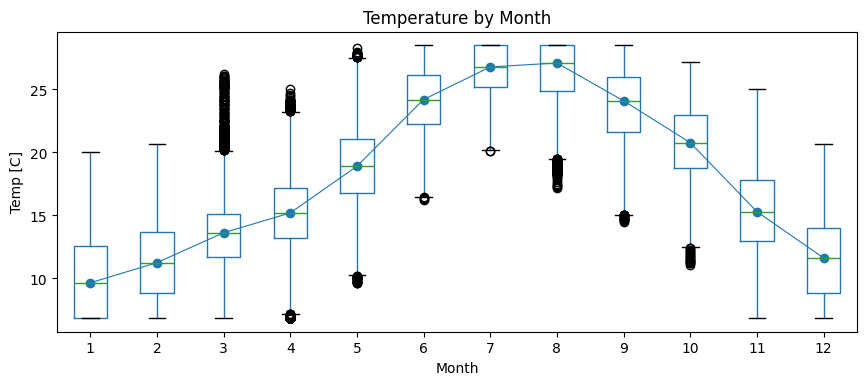

In [91]:
fig, ax = plt.subplots(figsize=(10, 4))
df_PV.boxplot(column='temp [C]', by='Month', ax=ax)
df_PV.groupby('Month')['temp [C]'].median().plot(style='o-', linewidth=.8, ax=ax)
ax.set_ylabel('Temp [C]')
ax.set_title("Temperature by Month")
fig.suptitle('')

Text(0.5, 0.98, '')

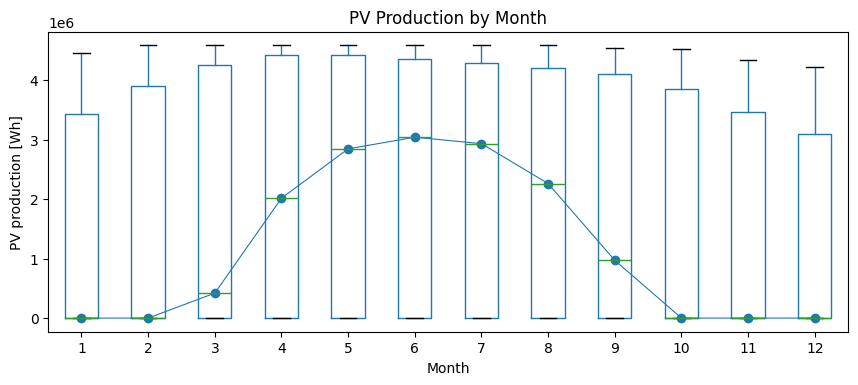

In [92]:
fig, ax = plt.subplots(figsize=(10, 4))
df_PV.boxplot(column='PV [Wh]', by='Month', ax=ax)
df_PV.groupby('Month')['PV [Wh]'].median().plot(style='o-', linewidth=.8, ax=ax)
ax.set_ylabel('PV production [Wh]')
ax.set_title("PV Production by Month")
fig.suptitle('')

Text(0.5, 0.98, '')

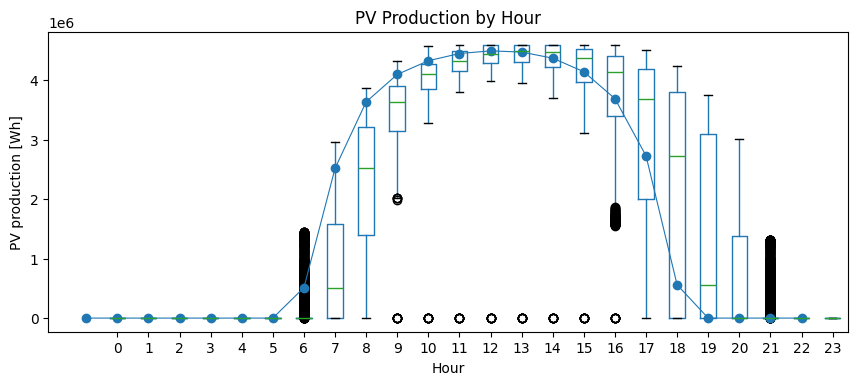

In [93]:
fig, ax = plt.subplots(figsize=(10, 4))
df_PV.boxplot(column='PV [Wh]', by='Hour', ax=ax)
df_PV.groupby('Hour')['PV [Wh]'].median().plot(style='o-', linewidth=.8, ax=ax)
ax.set_ylabel('PV production [Wh]')
ax.set_title("PV Production by Hour")
fig.suptitle('')

Text(0.5, 0.98, '')

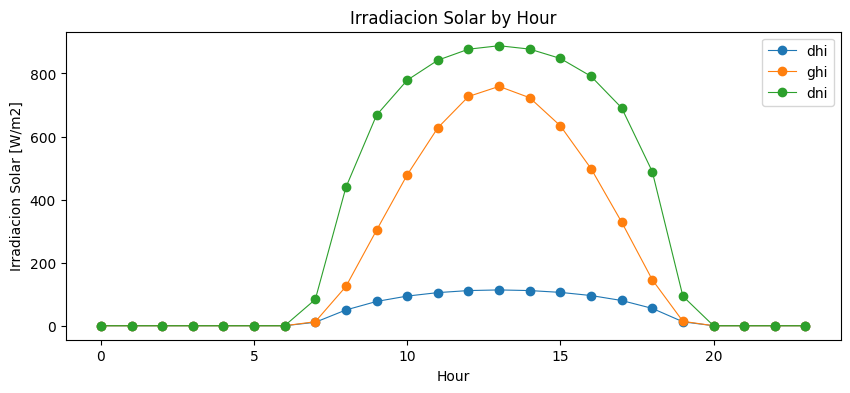

In [94]:
fig, ax = plt.subplots(figsize=(10, 4))

# df_PV.boxplot(column='dhi [W/m^2]', by='Hour', ax=ax)
df_PV.groupby('Hour')['dhi [W/m^2]'].median().plot(style='o-', linewidth=.8, ax=ax)

# df_PV.boxplot(column='ghi [W/m^2]', by='Hour', ax=ax)
df_PV.groupby('Hour')['ghi [W/m^2]'].median().plot(style='o-', linewidth=.8, ax=ax)

# df_PV.boxplot(column='dni [W/m^2]', by='Hour', ax=ax)
df_PV.groupby('Hour')['dni [W/m^2]'].median().plot(style='o-', linewidth=.8, ax=ax)

ax.legend(['dhi', 'ghi', 'dni'])

# dhi                      Irradiancia solar difusa en el plano horizontal    W/m2 [Clear Sky] 
# ghi                      Irradiancia solar global en el plano horizontal    W/m2 [Clear Sky] 
# dni                      Irradiancia solar directa normal                   W/m2 [Clear Sky] 

ax.set_ylabel('Irradiacion Solar [W/m2]')
ax.set_title("Irradiacion Solar by Hour")
fig.suptitle('')

# DF para mergerar con Consumo

In [95]:
# dropear las variables temporales, solo se usan para graficos. 
df_PV = df_PV.drop(columns=['Year', 'Month', 'Hour', 'DayOfWeek', 'DayOfYear', 'Day', 'Minute'])

In [96]:
df_PV.sample(5)

,timestamp_local,pres [mb],slp [mb],wind_dir [m/s],wind_gust_spd [m/s],wind_spd [m/s],temp [C],app_temp [C],rh [%],dewpt [C],dhi [W/m^2],dni [W/m^2],ghi [W/m^2],solar_rad [W/m^2],uv [0-11+],elev_angle [º],azimuth [º],Temp interna Modulo [C],PV [Wh]
73734,2024-02-08 01:30:00,1014.50,1015.00,60.0,6.800,1.800,11.800,11.800,62.00,4.750,0.00,0.0,0.0,0.0,0.0,-58.40,192.500,22.563074,0.000000e+00
49747,2023-06-03 04:45:00,1012.00,1012.75,360.0,2.600,2.600,17.675,17.675,84.50,15.000,0.00,0.0,0.0,0.0,0.0,-14.35,41.275,25.216859,0.000000e+00
25915,2022-09-27 22:45:00,1011.00,1011.00,22.5,5.300,2.600,20.775,20.600,64.50,13.850,0.00,0.0,0.0,0.0,0.0,-33.95,302.775,26.617154,0.000000e+00
13085,2022-05-17 07:15:00,1017.25,1018.00,320.0,3.475,3.475,17.250,17.250,70.75,11.875,38.75,326.5,79.5,76.0,1.7,6.80,69.950,32.438392,1.899184e+06
27400,2022-10-13 10:00:00,1022.00,1022.00,360.0,4.400,4.090,19.400,19.400,77.00,15.300,78.00,675.0,301.0,286.0,1.2,19.90,121.000,41.322605,3.645091e+06


In [97]:
# Guardar el DataFrame como CSV
nombre_archivo = "LaMonserratina_weather_&_PV.csv"
ruta_completa = os.path.join(ruta_data, nombre_archivo)

df_PV.to_csv(ruta_completa)

In [98]:
nombre_archivo = "LaMonserratina_weather_&_PV.csv"

df = pd.read_csv(os.path.join(ruta_data, nombre_archivo))

df.head()

,Unnamed: 0,timestamp_local,pres [mb],slp [mb],wind_dir [m/s],wind_gust_spd [m/s],wind_spd [m/s],temp [C],app_temp [C],rh [%],dewpt [C],dhi [W/m^2],dni [W/m^2],ghi [W/m^2],solar_rad [W/m^2],uv [0-11+],elev_angle [º],azimuth [º],Temp interna Modulo [C],PV [Wh]
0,0,2022-01-01 00:00:00,1027.0,1028.0,360.0,4.0,1.275,10.7,10.7,88.25,9.500,0.0,0.0,0.0,0.0,0.0,-58.4,323.400,22.066196,0.0
1,1,2022-01-01 00:15:00,1027.0,1028.0,357.5,4.1,1.400,10.7,10.7,88.25,9.325,0.0,0.0,0.0,0.0,0.0,-58.4,243.575,22.066196,0.0
2,2,2022-01-01 00:30:00,1027.0,1028.0,355.0,4.2,1.800,10.7,10.7,88.25,9.150,0.0,0.0,0.0,0.0,0.0,-58.4,163.650,22.066196,0.0
3,3,2022-01-01 00:45:00,1027.0,1028.0,352.5,4.3,2.200,10.7,10.7,88.25,8.975,0.0,0.0,0.0,0.0,0.0,-58.4,83.725,22.066196,0.0
4,4,2022-01-01 01:00:00,1027.0,1028.0,350.0,4.4,2.600,10.7,10.7,88.00,8.800,0.0,0.0,0.0,0.0,0.0,-58.4,30.310,22.066196,0.0
